# Exploro ATENCION

## Filtro: Motivo atencion

### 1. Frecuencias y agrupaciones por palabras repeitdas

### 2. WE
Distancias graficadas
Asociaciones.

### 3. TF-IDF y reentreno.
Grafico todo el espacio vectorial?

### 4. WE preentrenados para visualizar?


In [1]:
import numpy as np
import pandas as pd

import itertools
import collections

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize

In [2]:
path_df = "..\\..\\..\\data_nps\\"
path_processed = "..\\..\\..\\data_nps\\processed\\"
figures = "..\\figures\\"

In [15]:
df = pd.read_csv(dashboard + "motivos-atributos-col.csv")

In [16]:
df.head()

,Unnamed: 0,RESPONSE_DATE,CURRENT_STATUS,ALL_LOG_NOTES_COMBINED,DETAILED_DESCRIPTION_ISSUE,ABLE_TO_RESOLVE_ISSUE,RISK_CHURN,DOCUMENT_TYPE,DOCUMENT_NUMBER,GENDER,...,atr_demora,atr_reiteracion,atr_eficacia,atr_sucursal,atr_callcenter,atr_digital,atr_baja,motivos,atributos,detected
0,0,2019-01-02,Resolved,[2019-01-02 10:46:48] Alert Created: Detractor...,NaN,NaN,NaN,DNI,24257783,M,...,0,0,0,0,0,0,0,[],[],False
1,1,2019-01-04,Closed,[2019-01-04 07:35:23] Alert Created: Promoter ...,NaN,NaN,NaN,DNI,12017332,M,...,0,0,0,0,0,0,0,[],[],False
2,2,2019-01-01,Closed,[2019-01-01 07:53:24] Alert Created: Promoter ...,NaN,NaN,NaN,DNI,34836542,M,...,0,0,1,0,0,0,0,['atencion'],['eficacia'],True
3,3,2019-01-09,Resolved,[2019-01-09 05:06:28] Alert Created: Detractor...,NaN,NaN,NaN,DNI,23400282,F,...,0,0,0,0,0,0,0,[],[],False
4,4,2019-01-10,Closed,[2019-01-10 18:46:29] Alert Created: Promoter ...,NaN,NaN,NaN,DNI,24894509,M,...,0,0,0,0,0,0,0,['atencion'],[],True


In [17]:
nps_dict = {
    0:"Detractor",
    1:"Detractor",
    2:"Detractor",
    3:"Detractor",
    4:"Detractor",
    5:"Detractor",
    6:"Detractor",
    7:"Neutro",
    8:"Neutro",
    9:"Promotor",
    10:"Promotor"
}

In [18]:
df["NPS_SEGMENT"] = df.TNPS_SCORE.apply(lambda x: nps_dict[x])

## Filtro atencion

In [49]:
atencion = df[df['motivos'].str.contains("atencion")]

In [50]:
atencion.comments_clean

2                      la amabilidad y rapidez de atencion
4                              la atencion y los servicios
5        respondieron prontamente a mi pedido y se pudo...
15                          excelente atencion y prontitud
17       tuve que cambiar mi seguro a una categoria mas...
                               ...                        
96625    pronta respuesta y solucion ante un siniestro ...
96626                         seriedad y esmerada atencion
96627    muy rapida efectiva y por distintos medios la ...
96628    por la atencion y el cumplimento de los servic...
96630    relacion costo beneficio es optima y exelente ...
Name: comments_clean, Length: 41013, dtype: object

# extracting the stopwords from nltk library
sw = stopwords.words('spanish')

def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

atencion['comments_clean'] = atencion['comments_clean'].apply(stopwords)
atencion.comments_clean.head(10)

In [51]:
import re

In [52]:
atencion["comments_clean"]= atencion["comments_clean"].apply(lambda x: re.sub(r"seguro .*","", x))

In [53]:
atencion["comments_clean"]= atencion["comments_clean"].apply(lambda x: re.sub(r"caja .*","", x))
atencion["comments_clean"]= atencion["comments_clean"].apply(lambda x: re.sub(r"atencion .*","", x))
atencion["comments_clean"]= atencion["comments_clean"].apply(lambda x: re.sub(r"atendieron .*","", x))

In [54]:
STOP_WORDS = stopwords.words('spanish')

def tokenize(x):
    return [word for word in word_tokenize(x) if word not in STOP_WORDS and word.isalpha() and len(word)>2]

In [55]:
atencion["comments_clean"] = atencion["comments_clean"].apply(lambda x:tokenize(x))

In [56]:
atencion["comments_clean"].head()

2                       [amabilidad, rapidez, atencion]
4                                                    []
5     [respondieron, prontamente, pedido, pudo, reso...
15                                          [excelente]
17                                            [cambiar]
Name: comments_clean, dtype: object

In [57]:
atencion_detractor = atencion[atencion.NPS_SEGMENT == "Detractor"]
atencion_promotor = atencion[atencion.NPS_SEGMENT == "Promotor"]
atencion_neutros = atencion[atencion.NPS_SEGMENT == "Neutro"]

In [58]:
p_text = atencion_promotor["comments_clean"].tolist()
d_text = atencion_detractor["comments_clean"].tolist()
n_text = atencion_detractor["comments_clean"].tolist()


p_text = [w.split() for w in p_text]
d_text = [w.split() for w in d_text]
n_text = [w.split() for w in n_text]


In [59]:
p_text_corpus = list(itertools.chain(*p_text))
d_text_corpus = list(itertools.chain(*d_text))
n_text_corpus = list(itertools.chain(*n_text))


In [60]:
p_text = collections.Counter(p_text_corpus)
d_text = collections.Counter(d_text_corpus)
n_text = collections.Counter(n_text_corpus)


In [61]:
p_text.most_common(50)

[('buena', 9259),
 ('atencion', 6391),
 ('excelente', 4098),
 ('respuesta', 3236),
 ('rapida', 2303),
 ('siempre', 1586),
 ('servicio', 1278),
 ('rapidez', 1235),
 ('bien', 788),
 ('buen', 603),
 ('atendido', 568),
 ('inmediata', 488),
 ('rapido', 469),
 ('pronta', 436),
 ('problema', 409),
 ('exelente', 396),
 ('calidad', 395),
 ('siniestro', 377),
 ('auxilio', 362),
 ('tiempo', 357),
 ('respuestas', 336),
 ('solucion', 326),
 ('atendio', 322),
 ('atienden', 299),
 ('amabilidad', 278),
 ('problemas', 257),
 ('conforme', 251),
 ('amable', 237),
 ('eficiencia', 236),
 ('nunca', 234),
 ('años', 233),
 ('eficiente', 216),
 ('necesite', 207),
 ('forma', 194),
 ('hace', 188),
 ('atendida', 184),
 ('precio', 179),
 ('predisposicion', 170),
 ('trato', 167),
 ('cliente', 163),
 ('personal', 159),
 ('momento', 159),
 ('mecanico', 158),
 ('celeridad', 155),
 ('cordial', 154),
 ('cordialidad', 154),
 ('vez', 150),
 ('veces', 149),
 ('inconveniente', 144),
 ('resolucion', 144)]

In [62]:
d_text.most_common(50)

[('respuesta', 877),
 ('mala', 432),
 ('nunca', 360),
 ('mas', 325),
 ('siniestro', 268),
 ('servicio', 256),
 ('hace', 251),
 ('poliza', 243),
 ('dia', 235),
 ('telefono', 234),
 ('atienden', 225),
 ('atendio', 212),
 ('auto', 206),
 ('dias', 202),
 ('atencion', 200),
 ('falta', 169),
 ('cliente', 169),
 ('solo', 160),
 ('veces', 160),
 ('nadie', 156),
 ('baja', 155),
 ('llame', 153),
 ('años', 151),
 ('dos', 147),
 ('persona', 146),
 ('auxilio', 144),
 ('mail', 143),
 ('problema', 138),
 ('buena', 134),
 ('bien', 134),
 ('whatsapp', 133),
 ('meses', 132),
 ('vez', 130),
 ('comunicarme', 128),
 ('descuento', 124),
 ('tiempo', 120),
 ('pesima', 119),
 ('pago', 118),
 ('reclamo', 117),
 ('consulta', 116),
 ('demora', 115),
 ('respuestas', 112),
 ('vehiculo', 112),
 ('dieron', 110),
 ('aun', 108),
 ('despues', 107),
 ('respondieron', 106),
 ('esperando', 102),
 ('luego', 99),
 ('mes', 99)]

In [63]:
common_p = pd.DataFrame(p_text.most_common(20), columns = ["words", "count"])
common_d = pd.DataFrame(d_text.most_common(20), columns = ["words", "count"])

In [64]:
import matplotlib.pyplot as plt

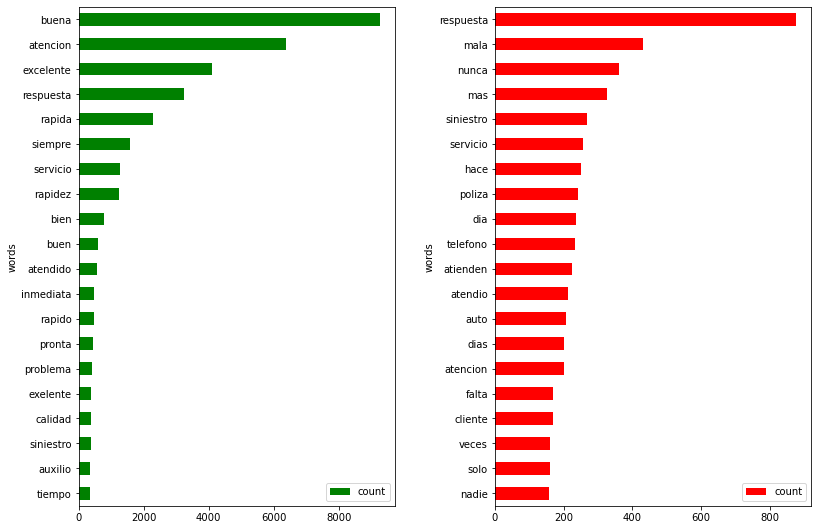

In [65]:
fig, ax = plt.subplots(1,2,figsize=(12, 8))

# Plot horizontal bar graph
common_p.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax[0],
                      color="green")
common_d.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax[1],
                      color="red")

#ax[0].set_title("Common Words Found in Negative Reviews")
fig.tight_layout(pad = 3.0)
plt.show()

In [66]:
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

               

In [67]:
corpuses = [" ".join(p_text_corpus), " ".join(n_text_corpus), " ".join(d_text_corpus)]
titles = ["Promotores", "Neutrales", "Detractores"]

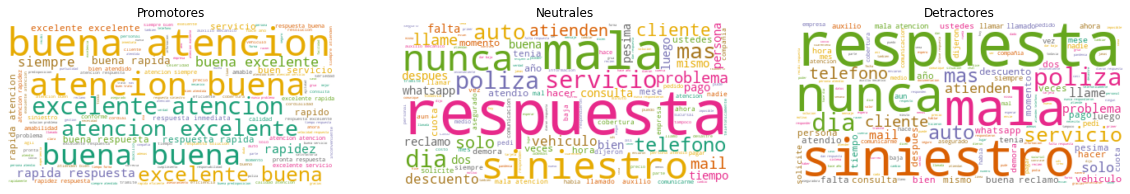

In [68]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 20]

# Create subplots for each comedian


for index, corpus in enumerate(corpuses):
    wc.generate(corpus)

    plt.subplot(1, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(titles[index])
    
plt.show()

In [69]:
corpuses = [" ".join(d_text_corpus)]
titles = ["Detractores"]

In [70]:
import cv2
from wordcloud import WordCloud 
import matplotlib.pyplot as plt#White text Black Background
image = cv2.imread(figures+'car5.png', 1)

In [71]:
from PIL import Image
import numpy as np

In [72]:
mask = np.array(Image.open(figures+'car1.jpg'))
wc = WordCloud(background_color='white', mask=mask, mode="RGB", max_words=256,
               max_font_size=256,  random_state=2)

wc = WordCloud(background_color='black', mask=mask, mode="RGB", color_func=lambda *args, **kwargs: "white", 
width=1000 , max_words=100, height=1000, random_state=1)

In [73]:
mask = np.array(Image.open(figures+'auto.jpg'))
wc = WordCloud(mask=mask, background_color="white",
               max_words=180, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])


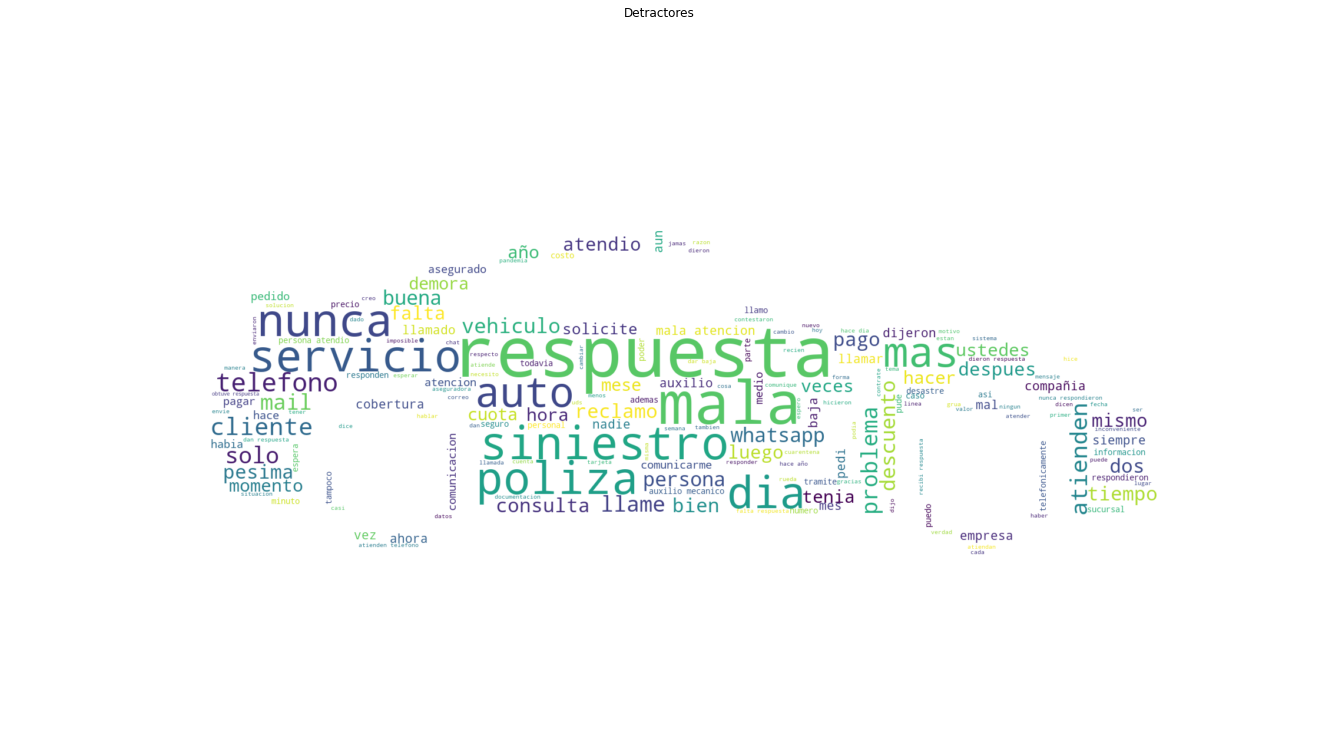

In [74]:

for index, corpus in enumerate(corpuses):
    wc.generate(corpus)

    plt.figure( figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.tight_layout(pad=0)
    plt.axis("off")
    plt.title(titles[index])
   
    # Display the generated image:

plt.show()